# Week 3: Regression, Sparsity and Model Selection

#### I Regression algorithm implementation 

This homework problem will illustrate the use of loss functions and gradient descent to implement linear regression. 

1. Implement a linear regression algorithm using your implementation of gradient descent for the following objective/loss functions: 

a. Mean absolute error :   

b. Least squared error :  

where .   

For the gradient descent implementation, you may not use an optimizer like scipy.optimize or cvx.     

2. Test your algorithm on the dataset almost_linear.csv  Download almost_linear.csvusing at most three different learning rates. Plot  errors as a function of number of iterations of your algorithm. Plot learning rate as a function of the number of iterations in your algorithm. State values for m, b and total error for each objective/loss function and learning rate combination.  

3. Compare your results with a standard linear regression solver like sklearn.linear_model.LinearRegression (Links to an external site.). 

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


m = 0.2236180399999975 | c = 0.00977010000000008 | learning rate = 1e-05
m = 0.5105735999999931 | c = 0.03199800000000003 | learning rate = 5e-05
m = 0.5105029000000124 | c = 0.05009500000000081 | learning rate = 0.0001


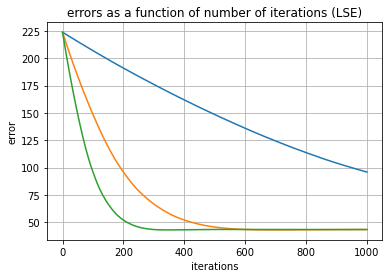

m = 0.5100639812770499 | c = 0.06507786549972415 | learning rate = 1e-05
m = 0.5038864135938536 | c = 0.2696551710054888 | learning rate = 5e-05
m = 0.4964031025286088 | c = 0.5253803384216016 | learning rate = 0.0001


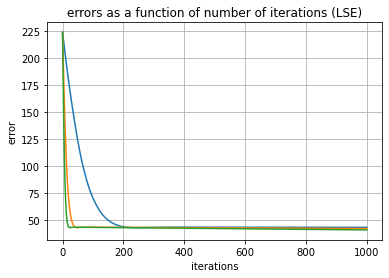

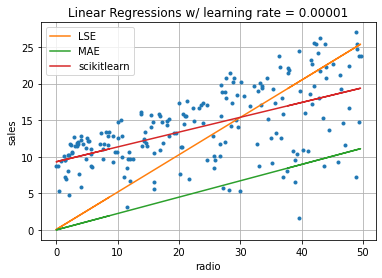

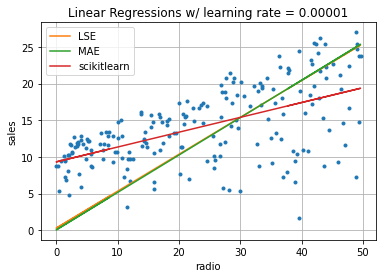

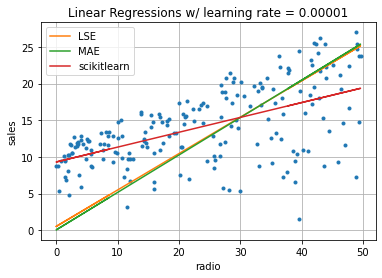

In [2]:
# MSE
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

df = pd.read_csv('almost_linear.csv')
display(df)

# slice different linear data
X = df.iloc[:, 2]
Y = df.iloc[:, 4]

# Building the model

Learning_rate = [0.00001, 0.00005, 0.0001]  # The learning Rate
iterations = 1000  # The number of iterations to perform gradient descent
x_range = np.linspace(0,iterations, iterations)

n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
error_calculation = []
for learn in Learning_rate:
    m = 0
    c = 0
    for i in range(iterations): 
        Y_pred = m*X + c  # The current predicted value of Y
        partial_m = (-1/n) * sum((X * (Y - Y_pred))/(abs(Y - Y_pred)))  # Derivative wrt m
        partial_c = (-1/n) * sum((Y - Y_pred)/(abs(Y - Y_pred)))  # Derivative wrt c
        m = m - learn * partial_m  
        c = c - learn * partial_c
        error_calculation.append(mean_squared_error(Y, Y_pred))
    
    plt.plot(x_range, error_calculation)
    error_calculation = []
    print ('m =',m,'| c =',c,'| learning rate =', learn)
plt.title('errors as a function of number of iterations (LSE)')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid()
plt.savefig('MAE_error.png')
plt.show()


# Least squared error
# Performing Gradient Descent 
x_range = np.linspace(0,iterations, iterations)
error_calculation = []
for learn in Learning_rate:
    m = 0
    c = 0
    for i in range(iterations): 
        Y_pred = m * X + c
        partial_m = (1 / n)**(1/2) * sum(X * ((Y_pred - Y) / abs(Y_pred - Y)))
        partial_c = (1 / n)**(1/2) * sum((Y_pred - Y) / abs(Y_pred - Y))
        m = m - learn * partial_m
        c = c - learn * partial_c
        error_calculation.append(mean_squared_error(Y, Y_pred))
    plt.plot(x_range, error_calculation)
    error_calculation = []
    print ('m =',m,'| c =',c,'| learning rate =', learn)
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid()
plt.title('errors as a function of number of iterations (LSE)')
plt.savefig('LSE_error.png')
plt.show()

# linear regressor comparison
n = float(len(X)) # Number of elements in X
n1 = float(len(X)) # Number of elements in X

linear_regressor = LinearRegression()
linear_regressor.fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))

Y_scikit = linear_regressor.predict(X.values.reshape(-1, 1))

for learn in Learning_rate:
    m = 0
    c = 0
    m1 = 0
    c1 = 0
    for i in range(iterations): 
        Y_pred = m * X + c
        partial_m = (1 / n)**(1/2) * sum(X * ((Y_pred - Y) / abs(Y_pred - Y)))
        partial_c = (1 / n)**(1/2) * sum((Y_pred - Y) / abs(Y_pred - Y))
        m = m - learn * partial_m
        c = c - learn * partial_c
        
        Y_pred1 = m1*X + c1  
        partial_m1 = (-1/n1) * sum((X * (Y - Y_pred1))/(abs(Y - Y_pred1)))  # Derivative wrt m
        partial_c1 = (-1/n1) * sum((Y - Y_pred1)/(abs(Y - Y_pred1)))  # Derivative wrt c
        m1 = m1 - learn * partial_m1  
        c1 = c1 - learn * partial_c1
    if learn == 0.00001:
        plt.plot(X,Y, ".")
        plt.plot(X, m*X+c, label = 'LSE')
        plt.plot(X, m1*X+c1, label = 'MAE')
        plt.plot(X, Y_scikit, label = 'scikitlearn')
        plt.legend()
        plt.title('Linear Regressions w/ learning rate = 0.00001')
        plt.grid()
        plt.xlabel('radio')
        plt.ylabel('sales')
        plt.savefig('LR_0.0001.png')
        plt.show()
    elif learn == 0.00005:
        plt.plot(X,Y, ".")
        plt.plot(X, m*X+c, label = 'LSE')
        plt.plot(X, m1*X+c1, label = 'MAE')
        plt.plot(X, Y_scikit, label = 'scikitlearn')
        plt.legend()
        plt.title('Linear Regressions w/ learning rate = 0.00001')
        plt.grid()
        plt.xlabel('radio')
        plt.ylabel('sales')
        plt.savefig('LR_0.0005.png')
        plt.show()
    else:
        plt.plot(X,Y, ".")
        plt.plot(X, m*X+c, label = 'LSE')
        plt.plot(X, m1*X+c1, label = 'MAE')
        plt.plot(X, Y_scikit, label = 'scikitlearn')
        plt.legend()
        plt.title('Linear Regressions w/ learning rate = 0.00001')
        plt.grid()
        plt.xlabel('radio')
        plt.ylabel('sales')
        plt.savefig('LR_0.001.png')
        plt.show()





#### II Model selection

This problem will illustrate the use of cross validation to find optimal model parameters to aid in model selection.

Download California housing data (Links to an external site.) .  This data contains eight predictor coefficients and one outcome (medianHouseValue).  

1. Explore the data.  Plot the distribution of median house value.   Plot median house value vs total bedrooms. Plot the correlation matrix.  Discuss plot results. 

2. Explore three different linear regression models: these can include least squares, lasso, ridge, elastic net, or any other linear (or nonlinear) regression model.  Perform a grid search on the regularization parameters, and use five fold cross validation to find parameter values that minimize the error on your test data for each of the three models. For each model, plot a) regularization parameter value vs. error on test data and error on training data b) regularization parameter value vs predictor coefficient values.   

3.  Plot test errors for all three models for the optimal parameters chosen in question 2.  Choose the model that best fits the data. Discuss the results. 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
1,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
2,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
3,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
4,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
...,...,...,...,...,...,...,...,...,...
20634,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20635,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20636,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20637,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


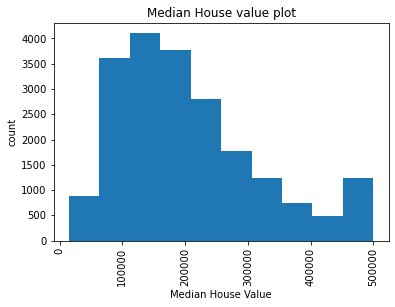

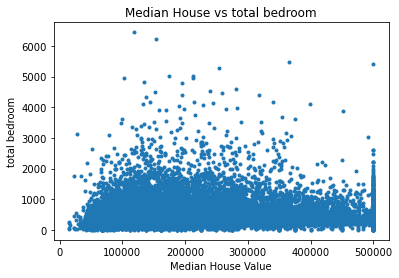

No handles with labels found to put in legend.


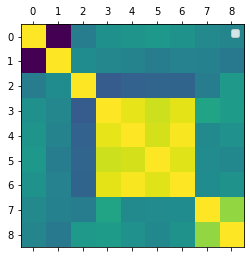

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('CaliforniaHousing/cal_housing.csv')

data = df.rename(columns={'-122.230000': 'longitude', '37.880000': 'latitude', '41.000000': 'housing_median_age', '880.000000': 'total_rooms', '129.000000': 'total_bedrooms', '322.000000': 'population', '126.000000': 'households', '8.325200': 'median_income', '452600.000000': 'median_house_value'})

display(data)


plt.hist(data['median_house_value'])
plt.title('Median House value plot')
plt.xlabel('Median House Value')
plt.ylabel('count')
plt.xticks(rotation='vertical')
plt.savefig('2.1.png')
plt.show()

plt.plot(data['median_house_value'], data['total_bedrooms'], '.')
plt.title('Median House vs total bedroom')
plt.xlabel('Median House Value')
plt.ylabel('total bedroom')
plt.savefig('2.2.png')
plt.show()

plt.matshow(data.corr())
plt.legend()
plt.savefig('2.3.png')
plt.show()





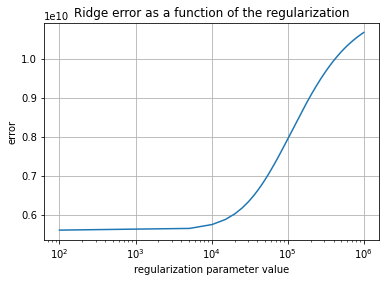

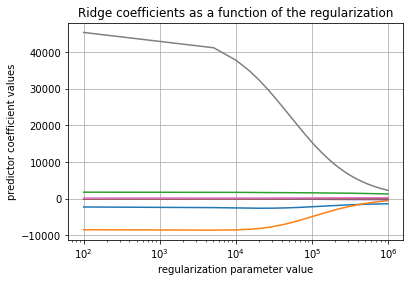

/Users/simonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57671651710849.84, tolerance: 115779888551.09691
  model = cd_fast.enet_coordinate_descent(
/Users/simonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34452787204861.695, tolerance: 115779888551.09691
  model = cd_fast.enet_coordinate_descent(
/Users/simonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9428792434111.562, tolerance: 115779888551.09691
  model = cd_fast.enet_coordinate_descent(
/Users/simonlee/opt/anaconda3/lib/python3.8/site-packages/sk

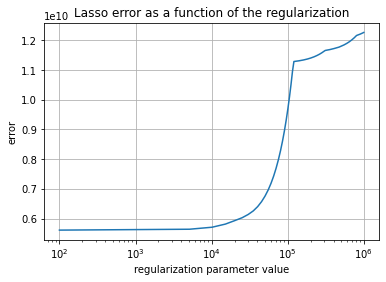

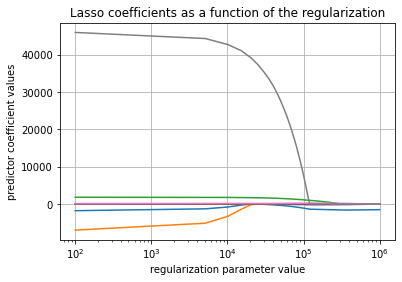

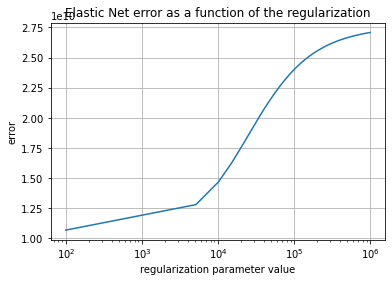

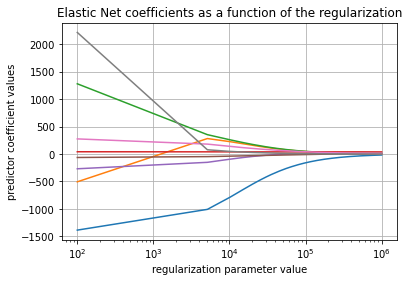

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import pandas as pd
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error

df = pd.read_csv('CaliforniaHousing/cal_housing.csv')

data = df.rename(columns={'-122.230000': 'longitude', '37.880000': 'latitude', '41.000000': 'housing_median_age', '880.000000': 'total_rooms', '129.000000': 'total_bedrooms', '322.000000': 'population', '126.000000': 'households', '8.325200': 'median_income', '452600.000000': 'median_house_value'})

# Part 2
X = data.iloc[:,0:8]
y = data.iloc[:,8]

# RIDGE

n_alphas = 200
alphas = np.linspace(10e1, 10e5, n_alphas)

coefs = []
mse = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    Y_pred = ridge.predict(X)
    mean = mean_squared_error(y, Y_pred)
    mse.append(mean)
    coefs.append(ridge.coef_)
    

ax = plt.gca()

ax.plot(alphas, mse)
ax.set_xscale("log")
plt.xlabel("regularization parameter value")
plt.ylabel("error")
plt.title("Ridge error as a function of the regularization")
plt.axis("tight")
plt.grid()
plt.savefig('2.4.png')
plt.show()
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("regularization parameter value")
plt.ylabel("predictor coefficient values")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.grid()
plt.savefig('2.5.png')
plt.show()


# Lasso
coefs = []
mse = []
for a in alphas:
    ridge = Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    Y_pred = ridge.predict(X)
    mean = mean_squared_error(y, Y_pred)
    mse.append(mean)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, mse)
ax.set_xscale("log")
plt.xlabel("regularization parameter value")
plt.ylabel("error")
plt.title("Lasso error as a function of the regularization")
plt.axis("tight")
plt.grid()
plt.savefig('2.6.png')
plt.show()

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("regularization parameter value")
plt.ylabel("predictor coefficient values")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.grid()
plt.savefig('2.7.png')
plt.show()

# Elastic net

coefs = []
mse = []
for a in alphas:
    ridge = ElasticNet(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    Y_pred = ridge.predict(X)
    mean = mean_squared_error(y, Y_pred)
    mse.append(mean)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, mse)
ax.set_xscale("log")
plt.xlabel("regularization parameter value")
plt.ylabel("error")
plt.title("Elastic Net error as a function of the regularization")
plt.axis("tight")
plt.grid()
plt.savefig('2.8.png')
plt.show()    
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("regularization parameter value")
plt.ylabel("predictor coefficient values")
plt.title("Elastic Net coefficients as a function of the regularization")
plt.axis("tight")
plt.grid()
plt.savefig('2.9.png')
plt.show()